<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-II/blob/main/Onda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Método explícito, ecuación de onda**

El problema a resolver es

$$\frac{\partial^2 u }{\partial t^2} -4 \frac{\partial^2 u }{\partial x^2}(x,t) =0$$

$$0 < x < 1, \quad  t > 0 $$

sujeta a las restricciones:

$$u(0,t) = u(1,t) = 0, \quad 0 <t $$

$$u(x,0) = \sin(\pi x)$$

$$\frac{\partial u}{\partial t} (x,0) = 0$$

Usando $h=0.1$ y $k = 0.05$.

Comparar resultados con la solución exacta:

$$u(x,t) = \sin \pi x \cos 2\pi t $$

In [418]:
#Importar librerias para los cálculos
import sympy as sp
import numpy as np

#Importar librerias para graficar
import matplotlib.pyplot as plt #Gráficas 2D
from mpl_toolkits.mplot3d import Axes3D  #Gráficas 3D
from matplotlib import cm  #Mapa de color

#Importar libreria para la tabla
from tabulate import tabulate #Tablas

#Para la animación
from matplotlib.animation import FuncAnimation

#Para mostrar la animación en Colab
from IPython.display import HTML

**sympy:** para matematicas simbólicas, en el código se utiliza para las matrices, como en:

```
sp.Matrix([])
```

```
A.LUsolve(b)
```
**numpy:** para matematicas numéricas, en el código se utiliza para:


```
np.pi
```

```
np.linspace()
```



```
np.concatenate([])
```



**matplotlib.pyplot:** para graficar funciones en 2D


```
plt.plot()
```

```
plt.figure()
```

**mpl_toolkits.mplot3d:** para habilitar gráficas en 3D

**matplotlib.cm:** para el mapa de color en 2D y 3D

**tabulate:** formar tablas



```
print(tabulate(data, tablefmt="grid"))
```

**matplotlib.animation:** crear animaciones cuadro por cuadro

```
anim = FuncAnimation(fig, update, frames=len(y), interval=200)
```










**IPython.display:** para mostrar animaciones dentro de Colab



```
HTML(anim.to_jshtml())
```



**Condición inicial:**

$$u(x,0) = \sin (\pi x), \quad 0 \leq x \leq 1 \quad \text{ y } \quad \frac{\partial u}{\partial t} (x,0) = 0, \quad 0 \leq x \leq 1 $$

In [419]:
#Defininr la condición inicial
def f(x):
    return np.sin(np.pi*x)

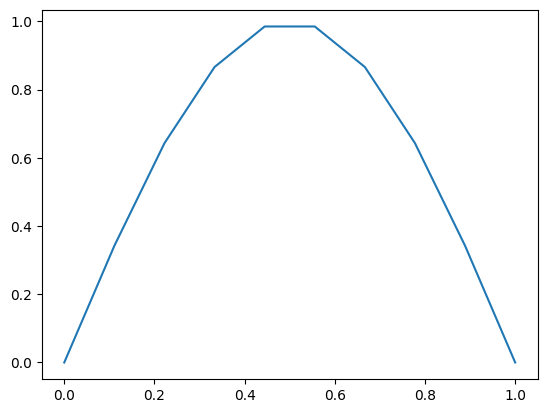

In [420]:
#Gráfica de la condición inicial
x = np.linspace(0,1,10)
plt.plot(x,f(x))

In [421]:
#Para una matriz tridiagonal
def tridiagonal(n,a,b):
  return sp.Matrix([
      [a if i ==j else b if abs(i-j) == 1 else 0 for j in range(n)]
      for i in range(n)
  ])

In [422]:
#Valor de r
r = 1

Para construir la matriz A, nos remontamos a

$$ u_{i, j+1} = 2 (1 + λ)u_{i,j} + λu_{i+1, j} + λu_{i-1, j} - u_{i, j-1}$$

En su forma matricial:

\begin{equation}
\begin{pmatrix}
    u_{1,j+1} \\
    u_{2,j+1} \\
    \vdots \\
    u_{m-1,j+1}
    \end{pmatrix}
=
\overbrace{
    \begin{pmatrix}
    2-2λ & λ &  \cdots & 0 \\
    λ & 2-2λ &  \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & λ & 2-2λ
    \end{pmatrix}
}^{\text{A}}
\overbrace{
    \begin{pmatrix}
    u_{1,j} \\
    u_{2,j} \\
    \vdots \\
    u_{m-1,j}
    \end{pmatrix}
}^{u_1}
-
\overbrace{
    \begin{pmatrix}
    u_{1,j-1} \\
    u_{2,j-1} \\
    \vdots \\
    u_{m-1,j-1}
    \end{pmatrix}
}^{u_0}
\end{equation}

Con $r$:

$$r = λ = \frac{\alpha^2 k^2}{h^2} $$

los valores de $h = 0.1$, $k = 0.05$

In [423]:
#Para la matriz A
A = tridiagonal(9,2 -2*r, r)

In [424]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [425]:
u0 = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [426]:
u1 = u0

In [427]:
#Definir la función de onda
def onda(A, u0, u1, j):
  #Asegurar que u0 y u1 sean vectores columna
  u0 = sp.Matrix(u0)
  u1 = sp.Matrix(u1)

  S = [u0,u1]

  for n in range(2,j):
    sol = A*S[n-1] - S[n-2]
    S.append(sol)

  #Regresar como una matriz donde cada fila es una sola
  return sp.Matrix([s.T for s in S])

In [428]:
j= 20 #Como es w_{i,20}, cambiamos el valor a j=20

In [429]:
U = onda(A, u0, u1, j) #Ya es la salida de la función

In [430]:
U[1] #solo para ver

0.587785252292473

In [431]:
#Para realizar la tabla
data = [list(U.row(i)) for i in range(10)]

print(tabulate(data, tablefmt = "grid"))

+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|  0.309017  |  0.587785 |  0.809017 |  0.951057 |  1        |  0.951057 |  0.809017 |  0.587785 |  0.309017  |
+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|  0.309017  |  0.587785 |  0.809017 |  0.951057 |  1        |  0.951057 |  0.809017 |  0.587785 |  0.309017  |
+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|  0.278768  |  0.530249 |  0.729825 |  0.85796  |  0.902113 |  0.85796  |  0.729825 |  0.530249 |  0.278768  |
+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+
|  0.221232  |  0.420808 |  0.579192 |  0.680881 |  0.715921 |  0.680881 |  0.579192 |  0.420808 |  0.221232  |
+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------

In [432]:
#Conversión a numpy
U_np = np.array(U.tolist(), dtype = float)

In [433]:
U_np[0] #Muestra la primera fila de nodos

array([0.30901699, 0.58778525, 0.80901699, 0.95105652, 1.        ,
       0.95105652, 0.80901699, 0.58778525, 0.30901699])

In [434]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.5, j) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

**Ejercicio 1.**

**Generar las gráficas 2D y 3D de la solución hasta t=0.50**

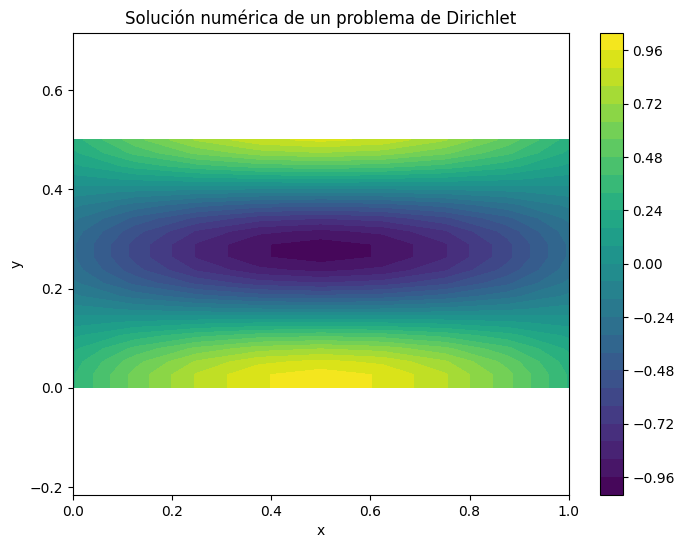

In [435]:
#Mapa de colores, gráfica 2D
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

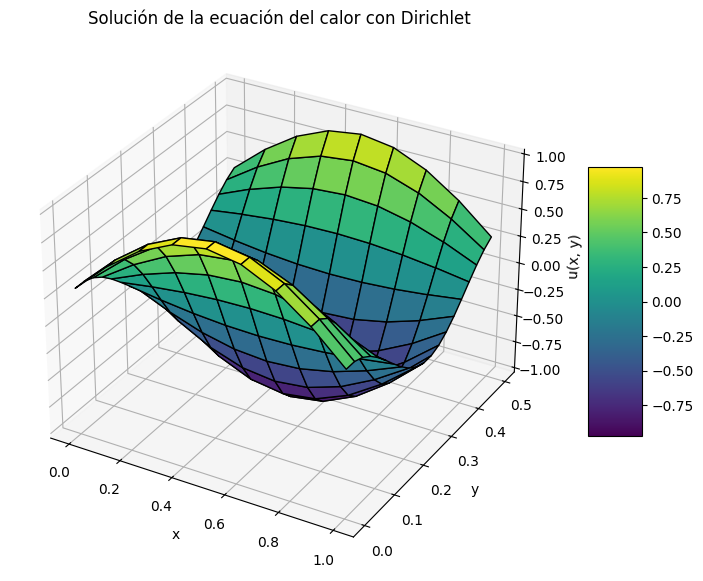

In [436]:
#Gráfica 3D
#%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**Ejericicio 2.**

**Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.**

In [437]:
#Poner en array los valores de la tabla 12.6
x_tabla = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) #Valores de x_i
w_tabla = np.array([0.0,0.3090169944,0.5877852523,0.8090169944,0.9510565163,1.0,0.9510565163,0.8090169944,0.5877852523,0.3090169944,0.0]) #Valores de w_{i,20}

In [438]:
indice_t = 19  #Para tener el valor en t = 1.0

In [439]:
U_numerico = U_np[indice_t, :] #Esto es para indicar el indice de j de U_np

In [440]:
U_numerico #Muestra el valor de U_np en el indice 19, como empezamos desde 0 es por ello que es 19

array([0.27876826, 0.53024874, 0.72982477, 0.85796048, 0.90211303,
       0.85796048, 0.72982477, 0.53024874, 0.27876826])

In [441]:
U_numerico = [0] + U_numerico + [0] #Para añadir los ceros de la frontera, es una forma de hacerlo pero no la correcta

In [442]:
U_numerico = np.concatenate(([0], U_numerico, [0])) #Para añadir los ceros de la frontera

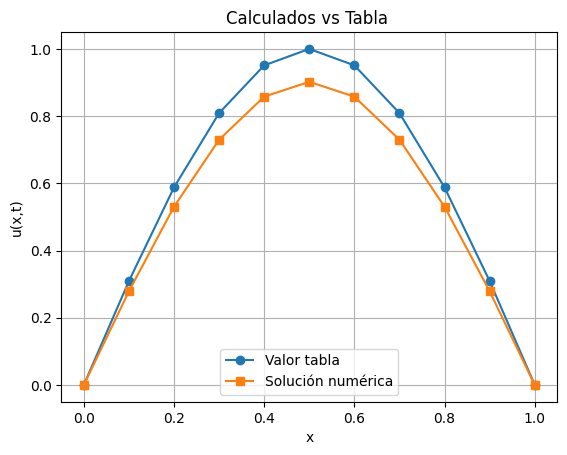

In [443]:
#Gráfica
plt.plot(x_tabla, w_tabla, marker="o", label="Valor tabla")
plt.plot(x_tabla, U_numerico, marker="s", label="Solución numérica")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title("Calculados vs Tabla ")
plt.show()

Para calcular el error, se decidió ocupar el error absoluto

**Error absoluto:**
$$\text{Error abs.} = \mid  \text{Valor numerico} - \text{Valor tabla}\mid$$

In [444]:
#Obtención del error con valor absoluto
error_tabla = np.abs(U_numerico - w_tabla)

print("Error en la solución numérica:")
print(error_tabla)

Error en la solución numérica:
[0.         0.03024874 0.05753652 0.07919222 0.09309604 0.09788697
 0.09309604 0.07919222 0.05753652 0.03024874 0.        ]


In [445]:
print("Error absoluto por punto:")
for i, e in enumerate(error_tabla):
    print(f"Punto {i}: {e:.6f}")

Error absoluto por punto:
Punto 0: 0.000000
Punto 1: 0.030249
Punto 2: 0.057537
Punto 3: 0.079192
Punto 4: 0.093096
Punto 5: 0.097887
Punto 6: 0.093096
Punto 7: 0.079192
Punto 8: 0.057537
Punto 9: 0.030249
Punto 10: 0.000000


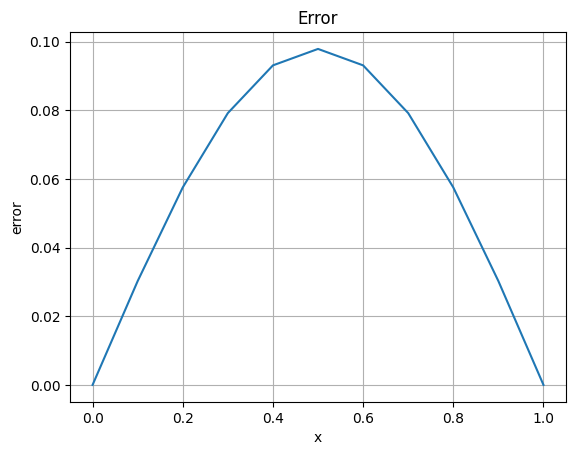

In [446]:
#Gráfica del error
plt.plot(x_tabla, error_tabla)
plt.grid()
plt.title("Error")
plt.xlabel("x")
plt.ylabel("error")
plt.show()

**Ejercicio 3.**

**Comparar esos mismos valores contra la solución exacta de la ecuación. Graficar y calcular el error. Discutir la comparación.**

La solución exacta:

$$u(x,t) = \sin \pi x \cos 2\pi t $$

In [447]:
def exacta(x,t):
    return np.sin(np.pi*x)*np.cos(2*np.pi*t)

In [448]:
U_exacta = exacta(x_tabla, 1.0)

In [449]:
U_exacta

array([0.00000000e+00, 3.09016994e-01, 5.87785252e-01, 8.09016994e-01,
       9.51056516e-01, 1.00000000e+00, 9.51056516e-01, 8.09016994e-01,
       5.87785252e-01, 3.09016994e-01, 1.22464680e-16])

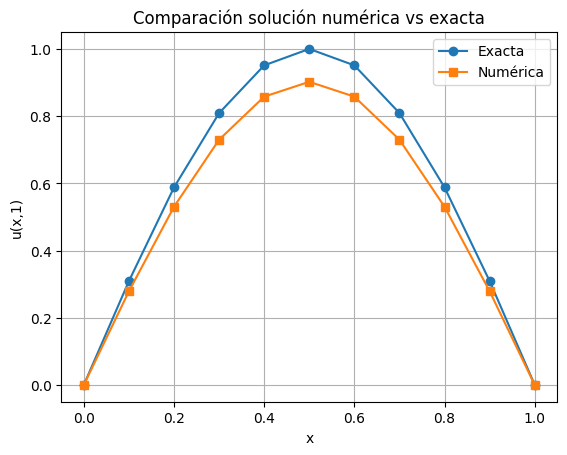

In [450]:
plt.plot(x_tabla, U_exacta, marker="o", label="Exacta")
plt.plot(x_tabla, U_numerico, marker="s", label="Numérica")
plt.legend()
plt.grid()
plt.title("Comparación solución numérica vs exacta")
plt.xlabel("x")
plt.ylabel("u(x,1)")
plt.show()

Para calcular el error, se decidió ocupar el error absoluto

**Error absoluto:**
$$\text{Error abs.} = \mid  \text{Valor numerico} - \text{Valor exacto}\mid$$

In [451]:
#Error absoluto
error_exacta = np.abs(U_numerico - U_exacta)

In [452]:
error_exacta

array([0.00000000e+00, 3.02487365e-02, 5.75365158e-02, 7.91922202e-02,
       9.30960382e-02, 9.78869674e-02, 9.30960382e-02, 7.91922202e-02,
       5.75365158e-02, 3.02487365e-02, 1.22464680e-16])

In [453]:
print("Error absoluto por punto:")
for i, e in enumerate(error_exacta):
    print(f"Punto {i}: {e:.6f}")

Error absoluto por punto:
Punto 0: 0.000000
Punto 1: 0.030249
Punto 2: 0.057537
Punto 3: 0.079192
Punto 4: 0.093096
Punto 5: 0.097887
Punto 6: 0.093096
Punto 7: 0.079192
Punto 8: 0.057537
Punto 9: 0.030249
Punto 10: 0.000000


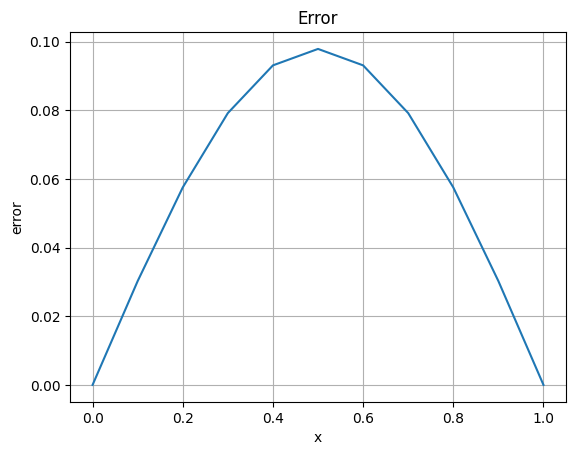

In [454]:
plt.plot(x_tabla, error_exacta)
plt.grid()
plt.xlabel("x")
plt.ylabel("error")
plt.title("Error")
plt.show()

Las graficas de ambas soluciones tiene formas similares, una está por encima de la otra. Aunque el valor es pequeño, no es tan pequeño como en Crank Nicolson, pero es por el valor que le dimos en $j$ ya que es menor a 50. Mientras sea mayor el valor de $j$ menor será el error.

**Ejercicio 4.**

**Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.**

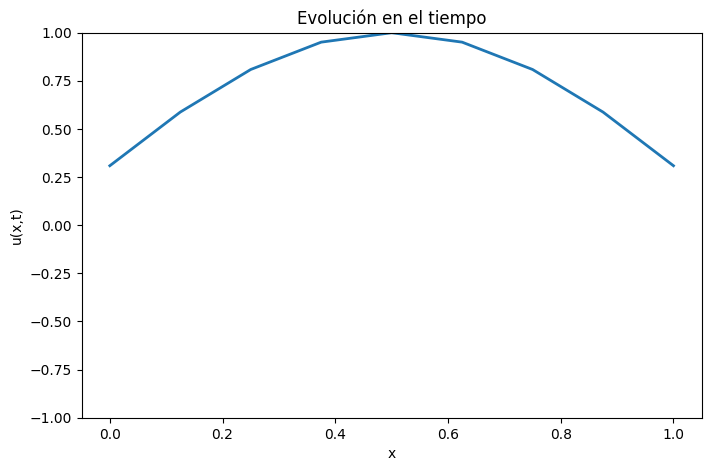

In [455]:
#Animación que funciona en Jupyter
#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U_np[0], lw=2)
ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

In [456]:
#Animación que funciona en Colab, pero no en Github
fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U_np[0], lw=2)
ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)

plt.close(fig)
HTML(anim.to_jshtml())

/usr/local/lib/python3.12/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [457]:
#Animación que se queda guardada como gif
fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U_np[0], lw=2)
ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)

plt.close(fig)
HTML(anim.to_jshtml())

#anim.save('onda.gif', writer='pillow', fps=10)

anim.save('/content/onda.gif', writer='pillow', fps=10) #Esto es para guardar y se queda guardada en una carpeta de Colab